# Regressão Linear - Bolsa De Valores Americana

## fonte de dados: https://finance.yahoo.com/
## https://finance.yahoo.com/screener/predefined/most_actives

In [79]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

In [30]:
# https://finance.yahoo.com/screener/predefined/most_actives
# açoes da Facebook
fb = pd.read_csv("fb.csv").set_index("Date")

fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [31]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-13,158.740005,159.779999,158.419998,159.259995,159.259995,13929200
2017-07-14,160.130005,160.320007,159.330002,159.970001,159.970001,16371200
2017-07-17,160.250000,160.779999,158.809998,159.729996,159.729996,12858800
2017-07-18,159.660004,163.729996,159.419998,162.860001,162.860001,23722900
2017-07-19,163.589996,165.699997,163.169998,164.139999,164.139999,26007000


In [32]:
# converte o index para o tipo data
fb.index = pd.to_datetime(fb.index)
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [33]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2012-05-18 to 2017-07-19
Data columns (total 6 columns):
Open         1300 non-null float64
High         1300 non-null float64
Low          1300 non-null float64
Close        1300 non-null float64
Adj Close    1300 non-null float64
Volume       1300 non-null int64
dtypes: float64(5), int64(1)
memory usage: 71.1 KB


In [34]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03
mean,78.058762,78.883938,77.176454,78.063777,78.063777,3.938419e+07
std,39.250163,39.436006,39.056692,39.301331,39.301331,3.325543e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,42.042499,43.887498,41.704999,42.349998,42.349998,1.981218e+07
50%,77.134998,77.974998,76.075001,77.205002,77.205002,2.952915e+07
75%,111.852503,112.849996,110.595003,112.212500,112.212500,4.819220e+07
max,163.589996,165.699997,163.169998,164.139999,164.139999,5.735764e+08


In [35]:
# Preparacao do modelo e aplicacao da regressao
olm = lm.LinearRegression()
X = numpy.array([x.toordinal() for x in fb.index])[:, numpy.newaxis]
y = fb['Close']

print(y[:5])

Date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
Name: Close, dtype: float64


In [36]:
#aplicacao do modelo de regressao
olm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# aplicando a predicao - datas
yp = [olm.predict(x.toordinal())[0] for x in fb.index]

# Avaliacao do modelo
olm_score = olm.score(X, y)
print(olm_score)

0.970454845955


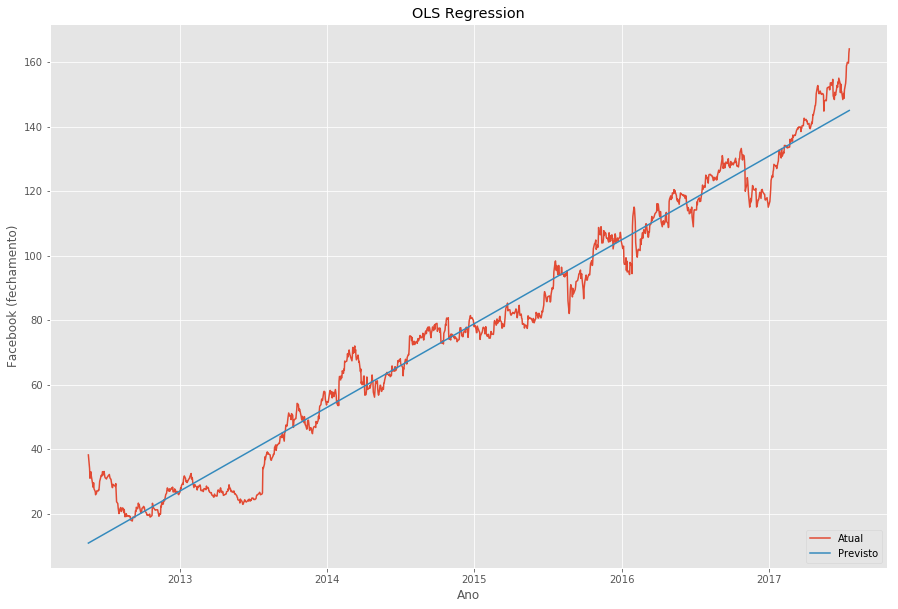

In [43]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, yp)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")


plt.show()

In [ ]:
# previsao para o ano de 2018

In [50]:
from datetime import datetime

data = "2018-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')


yp2018 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2018[0])

previsao para  2018-01-30  (fechamento) = us$  158.913273665


In [51]:
data = "2020-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')


yp2020 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2020[0])

previsao para  2020-01-30  (fechamento) = us$  210.788685624


In [52]:
data = "2025-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')


yp2025 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2025[0])

previsao para  2025-01-30  (fechamento) = us$  340.619339938


In [76]:
lucro = yp2025[0] / yp2018[0] * 100
print("diferenca ano 2025 - 2018 - Lucro da ação do Facebook (%) ->", "{:3.0f}%".format(lucro)  )

diferenca ano 2025 - 2018 - Lucro da ação do Facebook (%) -> 214%


# indice S&P Americano

In [2]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

# indice S&P Americano
sap = pd.read_csv("SP500.csv").set_index("Date")

sap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.09,17.09,17.08,17.08,17.08,3850000


In [4]:
sap.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-11,2427.350098,2429.300049,2412.790039,2425.530029,2425.530029,3106750000
2017-07-12,2435.750000,2445.760010,2435.750000,2443.250000,2443.250000,3171620000
2017-07-13,2444.989990,2449.320068,2441.689941,2447.830078,2447.830078,3067670000
2017-07-14,2449.159912,2463.540039,2446.689941,2459.270020,2459.270020,2736640000
2017-07-17,2459.500000,2462.820068,2457.159912,2459.139893,2459.139893,2793170000


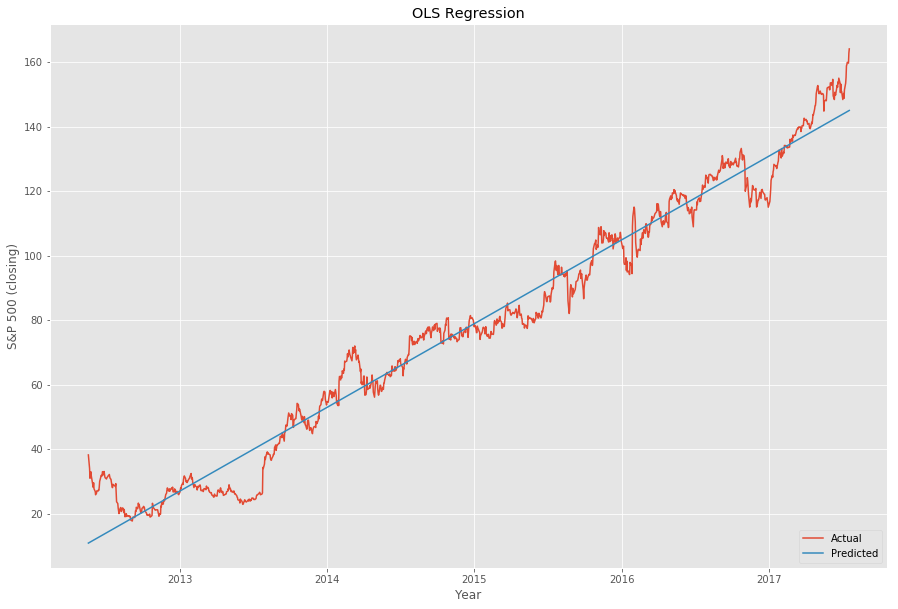

In [78]:
# Select a "linearly looking" part
sap.index = pd.to_datetime(sap.index)
sap_linear = sap.ix[sap.index > pd.to_datetime('2009-01-01')]

# Prepare the model and fit it
olm = lm.LinearRegression()
X = numpy.array([x.toordinal() for x in sap_linear.index])[:, numpy.newaxis]
y = sap_linear['Close']
olm.fit(X, y)

# Predict values
yp = [olm.predict(x.toordinal())[0] for x in sap_linear.index]

# Evaluate the model
olm_score = olm.score(X, y)

# Select a nice plotting style
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
plt.plot(sap_linear.index, y)
plt.plot(sap_linear.index, yp)

# Add decorations
plt.title("OLS Regression")
plt.xlabel("Year")
plt.ylabel("S&P 500 (closing)")
plt.legend(["Actual", "Predicted"], loc="lower right")
#plt.annotate("Score=%.3f" % olm_score, 
#             xy=(pd.to_datetime('2010-06-01'), 1900))
#plt.show()
plt.savefig("sp500-linregr.pdf")
plt.show()